In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cmo_msp = pd.read_csv("CMO_MSP_Mandi.csv")

In [4]:
cmo_msp.head()

,commodity,year,Type,msprice,msp_filter
0,PADDY-UNHUSKED,2012,Kharif Crops,1250.0,1
1,RICE(PADDY-HUS),2012,Kharif Crops,1280.0,1
2,Jowar_Hybrid,2012,Kharif Crops,1500.0,1
3,SORGUM(JAWAR),2012,Kharif Crops,1520.0,1
4,BAJRI,2012,Kharif Crops,1175.0,1


# Filling Nan Values

In [5]:
cmo_msp.isnull().sum()

commodity      0
year           0
Type           0
msprice       10
msp_filter     0
dtype: int64

In [6]:
cmo_msp[cmo_msp.msprice.isnull()]

,commodity,year,Type,msprice,msp_filter
107,Soyabean_Black,2015,Kharif Crops,NaN,1
138,Soyabean_Black,2016,Kharif Crops,NaN,1
142,WHEAT(HUSKED),2016,Rabi Crops,NaN,1
143,WHEAT(UNHUSKED),2016,Rabi Crops,NaN,1
144,BARLI,2016,Rabi Crops,NaN,1
145,Gram_Yellow,2016,Rabi Crops,NaN,1
146,Masur_Yellow,2016,Rabi Crops,NaN,1
147,MUSTARD,2016,Rabi Crops,NaN,1
148,SAFFLOWER,2016,Rabi Crops,NaN,1
149,Toria_Yellow,2016,Rabi Crops,NaN,1


As most of the missing values are for the year 2016. So,replacing it by the values of 2015.For, Soyabean_Black 2015 and 2016 msp is filled by its 2014 value.

In [7]:
cmo_msp_2 = cmo_msp.sort_values(by= ["commodity", "year"])
cmo_msp_2['commodity'] = [i.lower() for i in cmo_msp_2.commodity.values]
cmo_msp_2 = cmo_msp_2.fillna(method='ffill', limit=1)
cmo_msp_2 = cmo_msp_2.fillna(method='ffill', limit=1)


In [8]:
cmo_msp_2[cmo_msp_2.msprice.isnull()]

,commodity,year,Type,msprice,msp_filter


# Filtering Outliers

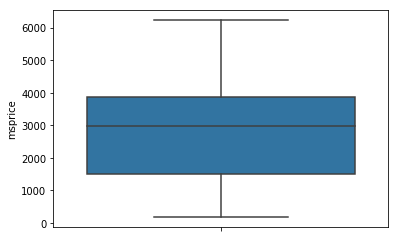

In [9]:
sns.boxplot(y="msprice", data=cmo_msp_2, whis=1.5)

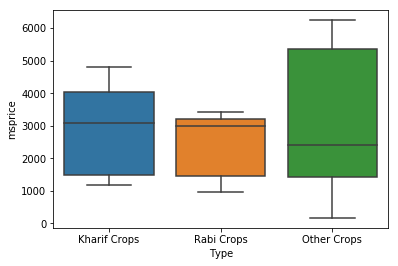

In [10]:
sns.boxplot(x="Type", y="msprice", data=cmo_msp_2, whis=1.5)

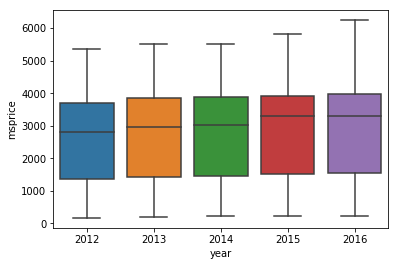

In [11]:
sns.boxplot(x="year", y="msprice", data=cmo_msp_2, whis=1.5)

These plots show that there are no outliers in msp.

In [12]:
cmo_msp_2.index = cmo_msp_2['year']
cmo_msp_2['Year']=cmo_msp_2['year']
cmo_msp_2.head()

,commodity,year,Type,msprice,msp_filter,Year
year,,,,,,
2012,bajri,2012,Kharif Crops,1175.0,1,2012
2013,bajri,2013,Kharif Crops,1310.0,1,2013
2014,bajri,2014,Kharif Crops,1250.0,1,2014
2015,bajri,2015,Kharif Crops,1275.0,1,2015
2016,bajri,2016,Kharif Crops,1330.0,1,2016


In [13]:
cmo_msp_2.year.unique()

array([2012, 2013, 2014, 2015, 2016])

In [14]:
years = [2014,2015, 2016]
cmo_msp_2_years= cmo_msp_2[cmo_msp_2.year.isin(years)]

In [15]:
cmo_msp_2_years.head()

,commodity,year,Type,msprice,msp_filter,Year
year,,,,,,
2014,bajri,2014,Kharif Crops,1250.0,1,2014
2015,bajri,2015,Kharif Crops,1275.0,1,2015
2016,bajri,2016,Kharif Crops,1330.0,1,2016
2014,barli,2014,Rabi Crops,1150.0,1,2014
2015,barli,2015,Rabi Crops,1225.0,1,2015


In [16]:
cmo_msp_2_years = cmo_msp_2_years.groupby(["commodity", "Year"], as_index=False).mean()

In [17]:
cmo_msp_2_years

,commodity,Year,year,msprice,msp_filter
0,bajri,2014,2014,1250.0,1
1,bajri,2015,2015,1275.0,1
2,bajri,2016,2016,1330.0,1
3,barli,2014,2014,1150.0,1
4,barli,2015,2015,1225.0,1
5,barli,2016,2016,1225.0,1
6,coconut,2014,2014,1425.0,1
7,coconut,2015,2015,1500.0,1
8,coconut,2016,2016,1600.0,1
9,copra (ball)_yellow,2014,2014,5500.0,1


/home/khwahish/.local/lib/python2.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


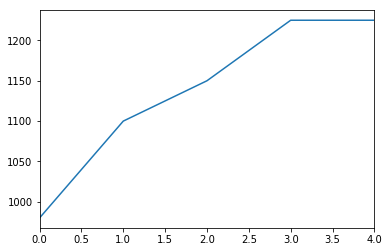

In [18]:
sns.tsplot(cmo_msp_2.loc[cmo_msp_2["commodity" ]== "barli","msprice"])

In [19]:
cmo_data = pd.read_csv("Monthly_data_cmo.csv")
cmo_data.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
0,Ahmednagar,Bajri,2015,April,79,1406,1538,1463,2015-04,Ahmadnagar,Maharashtra
1,Ahmednagar,Bajri,2016,April,106,1788,1925,1875,2016-04,Ahmadnagar,Maharashtra
2,Ahmednagar,Wheat(Husked),2015,April,1253,1572,1890,1731,2015-04,Ahmadnagar,Maharashtra
3,Ahmednagar,Wheat(Husked),2016,April,387,1750,2220,1999,2016-04,Ahmadnagar,Maharashtra
4,Ahmednagar,Sorgum(Jawar),2015,April,3825,1600,2200,1900,2015-04,Ahmadnagar,Maharashtra


In [20]:
cmo_data.describe()

,Year,arrivals_in_qtl,min_price,max_price,modal_price
count,62429.000000,6.242900e+04,6.242900e+04,6.242900e+04,62429.000000
mean,2015.337503,6.043088e+03,2.945228e+03,3.688814e+03,3296.003989
std,0.690451,3.470331e+04,1.318396e+04,7.662962e+03,3607.792534
min,2014.000000,1.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2015.000000,3.800000e+01,1.250000e+03,1.600000e+03,1450.000000
50%,2015.000000,2.110000e+02,1.976000e+03,2.797000e+03,2425.000000
75%,2016.000000,1.364000e+03,3.900000e+03,4.647000e+03,4257.000000
max,2016.000000,1.450254e+06,3.153038e+06,1.600090e+06,142344.000000


In [21]:
cmo_data.isnull().sum()

APMC               0
Commodity          0
Year               0
Month              0
arrivals_in_qtl    0
min_price          0
max_price          0
modal_price        0
date               0
district_name      0
state_name         0
dtype: int64

In [22]:
cmo_data['Commodity'] = [i.lower() for i in cmo_data.Commodity.values]

In [23]:
cmo_data_2 = cmo_data.groupby(["Commodity", "Year"], as_index=False).mean()

In [24]:
u1 = set(cmo_msp_2_years.commodity.unique())
u1

{'bajri',
 'barli',
 'coconut',
 'copra (ball)_yellow',
 'copra (milling)_yellow',
 'cotton',
 'cotton_long staple',
 'gr.nut kernels',
 'gram_yellow',
 'jowar_hybrid',
 'jute_yellow',
 'maize',
 'masur_yellow',
 'mustard',
 'niger-seed',
 'paddy-unhusked',
 'pigeon pea (tur)',
 'ragi_maldandi',
 'rice(paddy-hus)',
 'safflower',
 'sesamum',
 'sorgum(jawar)',
 'soyabean',
 'soyabean_black',
 'spilt gerrn gram',
 'split black gram',
 'sugar-cane',
 'sugarcane',
 'sunflower',
 'toria_yellow',
 'wheat(husked)',
 'wheat(unhusked)'}

In [25]:
u2 = set(cmo_data_2.Commodity.unique())
u2

{'amba koy',
 'ambat chuka',
 'amla',
 'apple',
 'arvi',
 'aster',
 'awala',
 'bajri',
 'banana',
 'banana(raw)',
 'baru seed',
 'batbati',
 'bedana',
 'beet root',
 'betelnuts',
 'bhagar/vari',
 'bijli',
 'bitter gourd',
 'black gram',
 'bor',
 'bottle gourd',
 'brinjal',
 'buffalo',
 'bullack',
 'bullock heart',
 'cabbage',
 'capsicum',
 'cardamom',
 'carrot',
 'cashewnuts',
 'castor seed',
 'chandani',
 'chavli (pala)',
 'chavli (shenga )',
 'chikoo',
 'chillies(red)',
 'chino',
 'cluster bean',
 'coconut',
 'coriander ',
 'coriander  ',
 'coriander (dry)',
 'cotton',
 'cow',
 'cowpea',
 'cucumber',
 'cummin',
 'curry leaves',
 'custard apple',
 'dhemse',
 'double bee',
 'elephant root',
 'farshi',
 'fennel',
 'fenugreek',
 'fig',
 'flower',
 'fodder',
 'french bean',
 'garlic',
 'ghee',
 'ghevda',
 'ghevda seed',
 'ghosali(bhaji)',
 'ginger (dry)',
 'ginger (fresh)',
 'goats',
 'goosefoot',
 'gr.nut kernels',
 'gram',
 'grapes',
 'green chilli',
 'green gram',
 'green peas (dry)',


In [26]:
print(list(cmo_data_2), len(cmo_data_2))
print(list(cmo_msp_2_years), len(cmo_msp_2_years))

(['Commodity', 'Year', 'arrivals_in_qtl', 'min_price', 'max_price', 'modal_price'], 536)
(['commodity', 'Year', 'year', 'msprice', 'msp_filter'], 93)


In [27]:
mergedData = pd.merge(left=cmo_data_2, right=cmo_msp_2_years, how='inner', left_on='Commodity', right_on='commodity')
len(mergedData)

165

In [28]:
mergedData.head()

,Commodity,Year_x,arrivals_in_qtl,min_price,max_price,modal_price,commodity,Year_y,year,msprice,msp_filter
0,bajri,2014,860.311321,1301.594340,1513.399371,1395.647799,bajri,2014,2014,1250.0,1
1,bajri,2014,860.311321,1301.594340,1513.399371,1395.647799,bajri,2015,2015,1275.0,1
2,bajri,2014,860.311321,1301.594340,1513.399371,1395.647799,bajri,2016,2016,1330.0,1
3,bajri,2015,668.526316,1310.002105,1496.816842,1405.248421,bajri,2014,2014,1250.0,1
4,bajri,2015,668.526316,1310.002105,1496.816842,1405.248421,bajri,2015,2015,1275.0,1


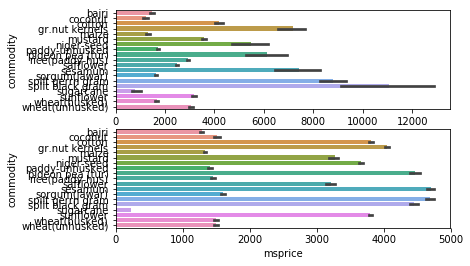

In [29]:
plt.subplot(211)
sns.barplot('modal_price', 'commodity', data=mergedData)
plt.subplot(212)
sns.barplot('msprice', 'commodity', data=mergedData)

In [30]:
bool_com = [i in cmo_msp_2_years.commodity.unique() for i in u2.intersection(u1)]

In [31]:
cmo_msp_2_years = cmo_msp_2_years.iloc[bool_com, :]

In [32]:
bool_3 = [i in cmo_data_2.Commodity.unique() for i in u2.intersection(u1)]

In [33]:
cmo_data_2 = cmo_data_2.iloc[bool_3, :]

In [34]:
cmo_data_2.Commodity.unique()

array(['amba koy', 'ambat chuka', 'amla', 'apple', 'arvi', 'aster',
       'awala', 'bajri'], dtype=object)

In [35]:
plt.rcParams['figure.figsize']=18,9

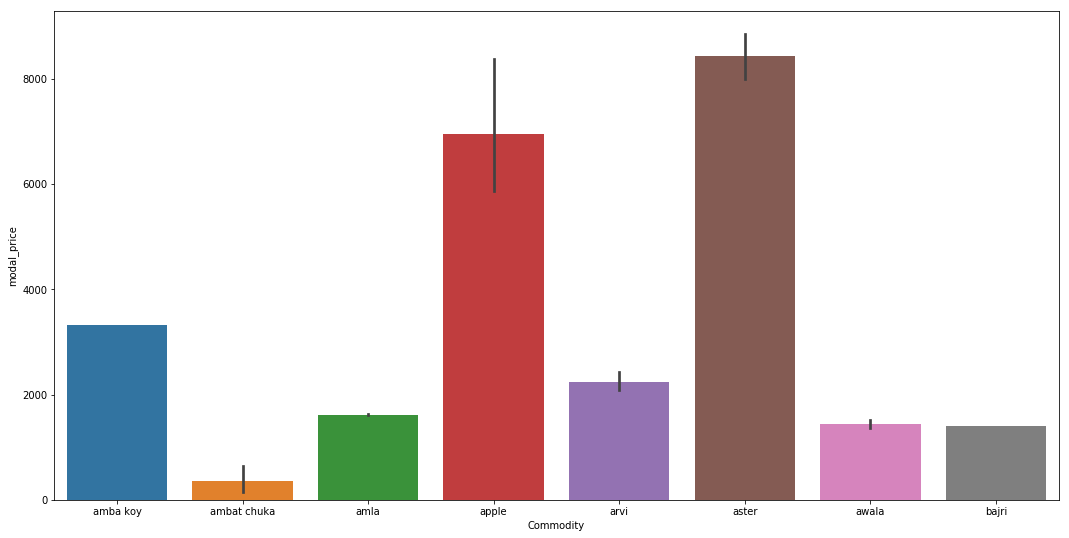

In [36]:
sns.barplot('Commodity', 'modal_price', data=cmo_data_2)

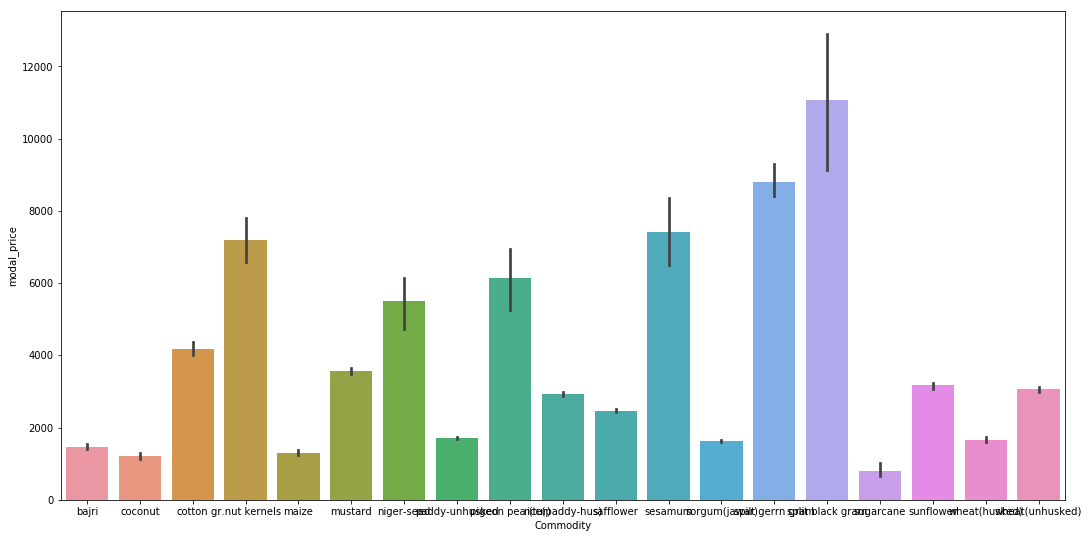

In [37]:
sns.barplot('Commodity', 'modal_price', data=mergedData)

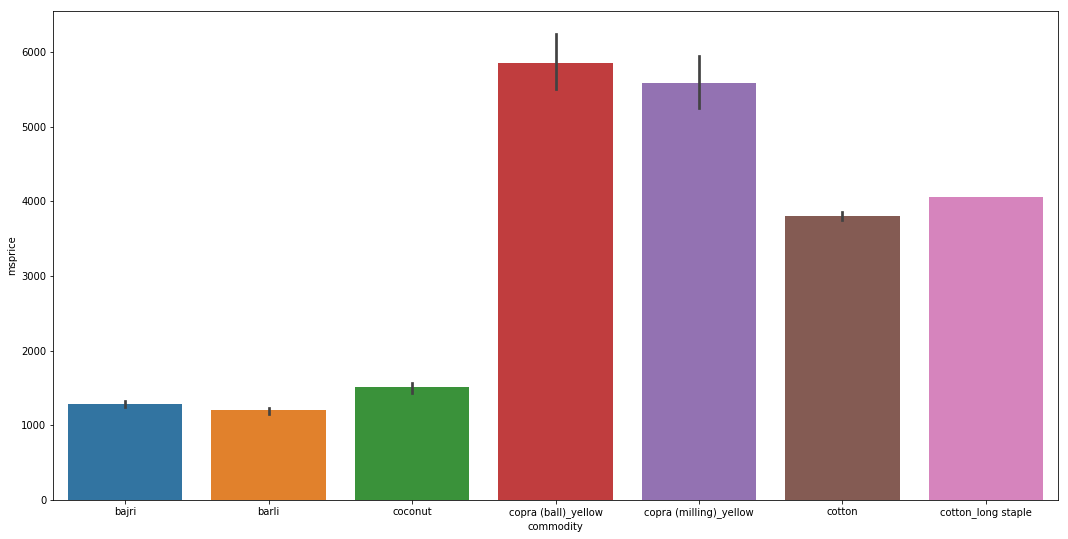

In [38]:
sns.barplot('commodity', 'msprice', data=cmo_msp_2_years)

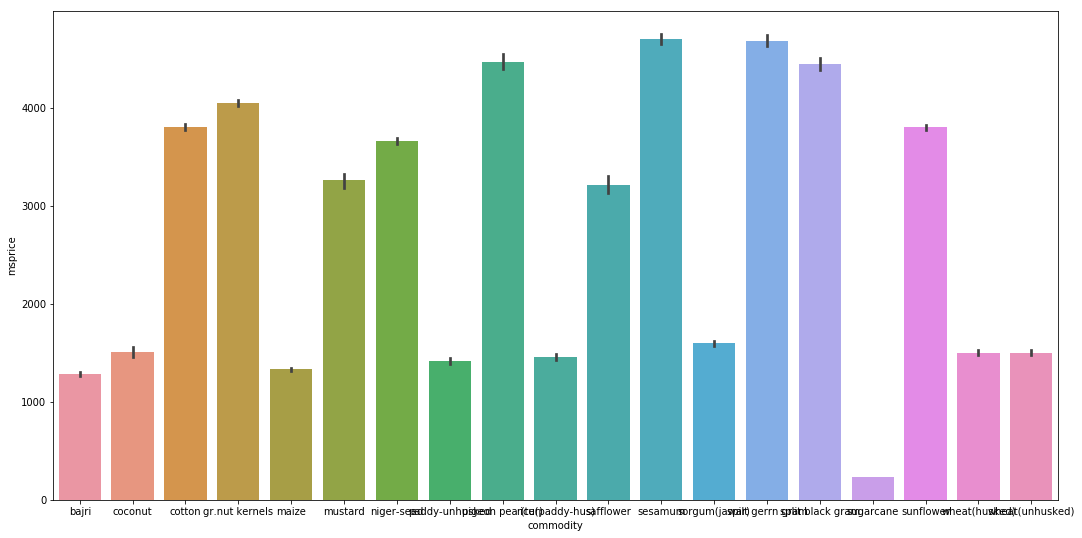

In [39]:
sns.barplot('commodity', 'msprice', data= mergedData)